In [2]:
from keras.layers import Input, Dense
from keras.models import Model

#### 1. Use the posted Python Code file to test MNIST image data: 

#### "EE628A_autoEncoder_demo.py" 

In [112]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [116]:
def auto_encoder(epochs, data):    
    # this is the size of our encoded representations
    encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
    
    # this is our input placeholder
    input_img = Input(shape=(784,))
    
    # "encoded" is the encoded representation of the input
    encoded = Dense(encoding_dim, activation='relu')(input_img)# "decoded" is the lossy reconstruction of the input
    
    decoded = Dense(784, activation='sigmoid')(encoded)
    
    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)
    
    # this model maps an input to its encoded representation
    encoder = Model(input_img, encoded)
    
    # create a placeholder for an encoded (32-dimensional) input
    encoded_input = Input(shape=(encoding_dim,))
    
    # retrieve the last layer of the autoencoder model
    decoder_layer = autoencoder.layers[-1]
    # create the decoder model
    decoder = Model(encoded_input, decoder_layer(encoded_input))


    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    (x_train, _), (x_test, _) = data

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    print(x_train.shape)
    print(x_test.shape)

    autoencoder.fit(x_train, x_train,
                    epochs=epochs,
                    batch_size=256,
                    shuffle=True,
                    verbose=1 if epochs % 10 == 0 else 0,
                    validation_data=(x_test, x_test))

    # encode and decode some digits
    # note that we take them from the *test* set
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = decoder.predict(encoded_imgs)

    # use Matplotlib (don't ask)
    import matplotlib.pyplot as plt

    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
  
    
    return plt.show()

In [117]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
# (x_train, _), (x_test, _) = fashion_mnist.load_data()
data = (x_train, _), (x_test, _)


#### 2. Use different epoch size from 5, 10, 20, 30, 40, 50, 100 and test the same code.

(60000, 784)
(10000, 784)
313/313 [==============================] - 0s 504us/step


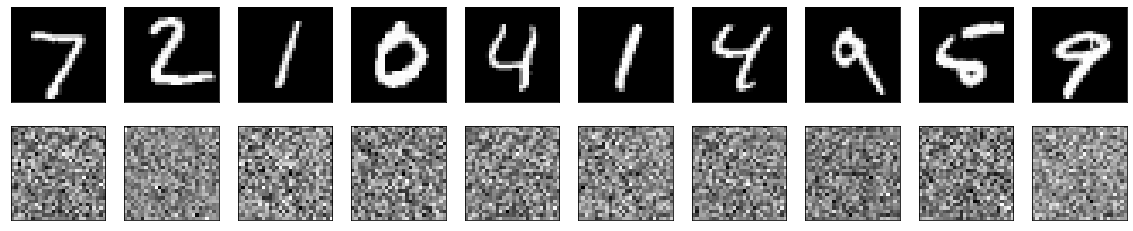

In [118]:
auto_encoder(5, data)

(60000, 784)
(10000, 784)
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 10/10
313/313 [==============================] - 0s 494us/step


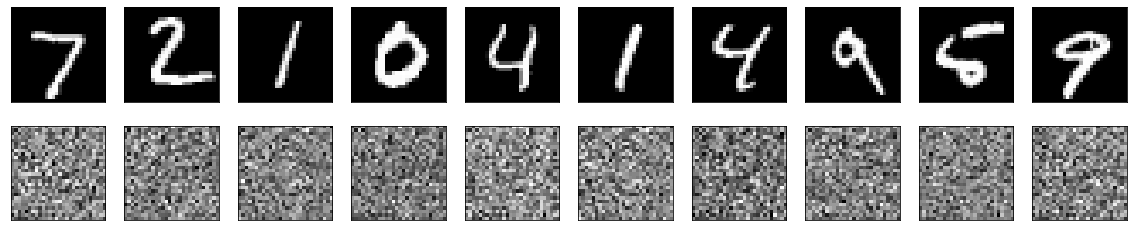

In [74]:
auto_encoder(10, data)

(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss:

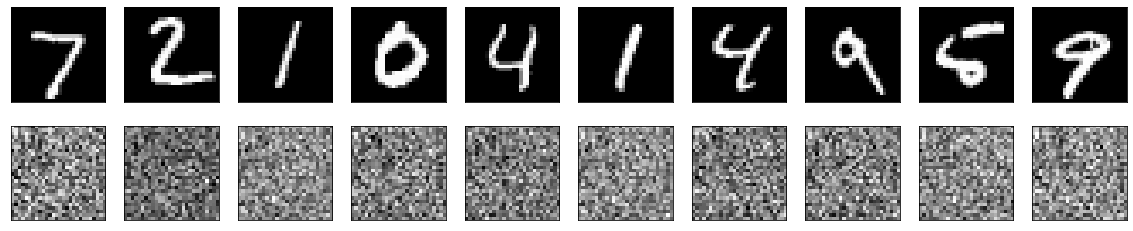

In [75]:
auto_encoder(20, data)

(60000, 784)
(10000, 784)
Epoch 1/30
235/235 [==============================] - 1s 4ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 10/30
235/235 [==============================] - 1s 3ms/step - loss:

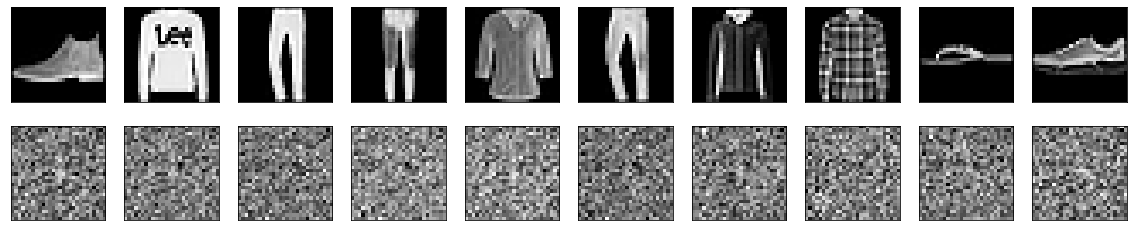

In [67]:
auto_encoder(30, data)

(60000, 784)
(10000, 784)
Epoch 1/40
235/235 [==============================] - 1s 4ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 2/40
235/235 [==============================] - 1s 4ms/step - loss: 0.6954 - val_loss: 0.6953
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 0.6952 - val_loss: 0.6950
Epoch 4/40
235/235 [==============================] - 1s 3ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 6/40
235/235 [==============================] - 1s 3ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 7/40
235/235 [==============================] - 1s 4ms/step - loss: 0.6944 - val_loss: 0.6943
Epoch 8/40
235/235 [==============================] - 1s 4ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 9/40
235/235 [==============================] - 1s 3ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 10/40
235/235 [==============================] - 1s 3ms/step - loss:

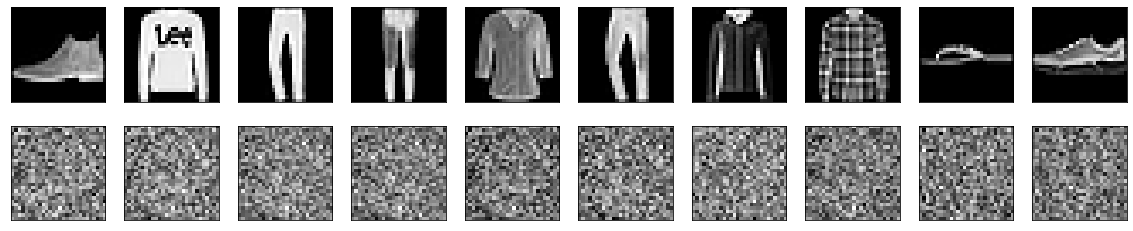

In [68]:
auto_encoder(40, data)

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6945 - val_loss: 0.6943
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6938
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss:

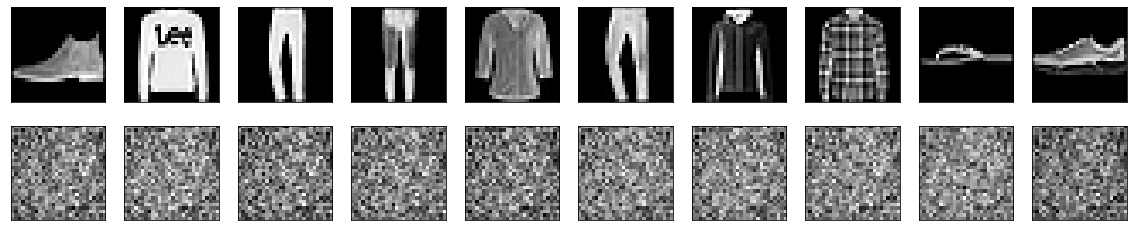

In [69]:
auto_encoder(50, data)

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 10/100
235/235 [==============================] - 1s 4ms/st

235/235 [==============================] - 1s 3ms/step - loss: 0.6797 - val_loss: 0.6795
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6793 - val_loss: 0.6791
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6789 - val_loss: 0.6788
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6785 - val_loss: 0.6784
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6781 - val_loss: 0.6780
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6777 - val_loss: 0.6775
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6773 - val_loss: 0.6771
Epoch 88/100
235/235 [==============================] - 1s 5ms/step - loss: 0.6769 - val_loss: 0.6767
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.6764 - val_loss: 0.6762
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.6760 - val_loss: 

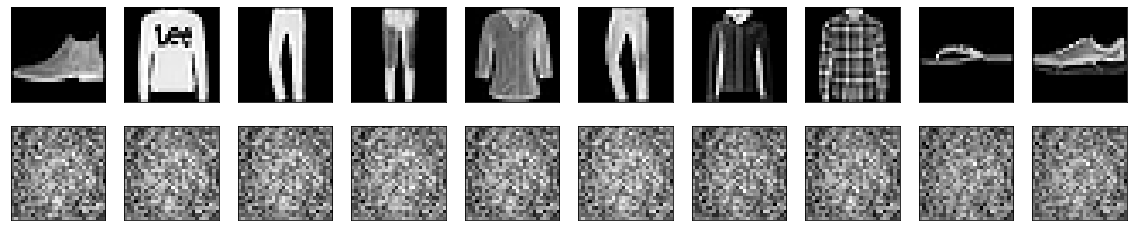

In [70]:
auto_encoder(100, data)

#### 3. Use different number of layers of the deep network (2,3,4,5) and compare the performances.

Using 3 layers


(60000, 784)
(10000, 784)
Epoch 1/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6919 - val_loss: 0.6918
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6916 - val_loss: 0.6915
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6915 - val_loss: 0.6914
Epoch 5/5
313/313 [==============================] - 0s 574us/step


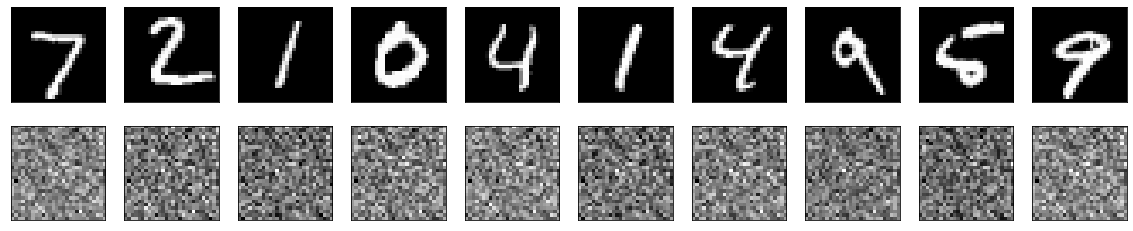

In [154]:
from keras.layers import Input, Dense
from keras.models import Model
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is
#784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### 4. Use auto encoder to find anomaly images:

#### 4.a You randomly download a few images other than the MNIST image dataset. For example, animals, furnitures, automobiles, etc.

for this question i downloaded the animals images from kaggle
https://www.kaggle.com/datasets/alessiocorrado99/animals10

In [258]:
from PIL import Image
import glob
from skimage import color, io, transform

#### 4.b Reform these images to a grayscale images without color channels (similar to the minist dataset).  

In [244]:
image_list = []
for filename in glob.glob('./archive/raw-img/cavallo/*.jpeg'):
    img = io.imread(filename)
    imgGray = color.rgb2gray(img)

    image_list.append(imgGray)

# Convert a few images to grayscale 28 x 28


AxesImage(10.8,27.8;410.4x245.762)
AxesImage(10.8,27.8;410.4x245.946)
AxesImage(10.8,27.8;410.4x245.947)
AxesImage(10.8,27.8;410.4x245.947)


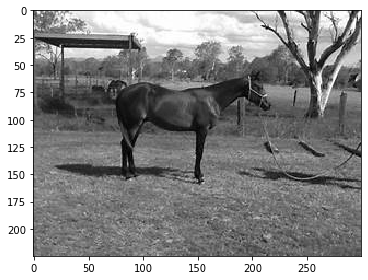

In [256]:

for i in range(1,5):
    print(io.imshow(image_list[i]))

#### Rescale Images

In [260]:
resized_list = []
for i in image_list:
    resize_img = transform.resize(i, (28,28))
    resized_list.append(resize_img)
    

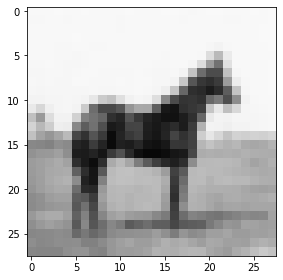

In [263]:
io.imshow(resized_list[5])